1. Import libraries

In [1]:
import utils_nithya as ul
import utils_fmp as uf
import numpy as np
import librosa
import matplotlib.pyplot as plt

2. Define analysis parameters

In [2]:
fs=16000
win_dur = 40e-3
hop_dur = 10e-3
win_size = int(np.ceil(win_dur*fs))
hop_size = int(np.ceil(hop_dur*fs))
n_fft = int(2**(np.ceil(np.log2(win_size))))

3. Define tempo related parameters

In [16]:
Theta=np.arange(30,601)
fs_odf=fs/hop_size
win_dur_tempo = 10
hop_dur_tempo = 0.5
win_size_tempo = int(np.ceil(win_dur_tempo*fs_odf))
hop_size_tempo = int(np.ceil(hop_dur_tempo*fs_odf))
fs_tempo = fs_odf/hop_size_tempo

3. Load audio, extract onset activations, pitch contour and spectrogram

In [17]:
x_mix,_ = librosa.load('./audios/mix_1.wav', sr=fs)
x_voc,_ = librosa.load('./audios/voc_1.wav', sr=fs)
x_pakh,_ = librosa.load('./audios/pakh_1.wav', sr=fs)

odf_voc,_ = ul.getODF(audio = x_voc, fs = fs, winSize = win_size, hopSize = hop_size, nFFT = n_fft, source='vocal')
tempogram_voc, T_coef, F_coef, A, F_coef_lag = uf.compute_tempogram_autocorr(odf_voc, fs_odf, N=win_size_tempo, H=hop_size_tempo, norm_sum=True, Theta=Theta)
tempogram_voc = 10*np.log10(1e-1 + tempogram_voc/np.max(tempogram_voc))

odf_pakh,_ = ul.getODF(audio = x_pakh, fs = fs, winSize = win_size, hopSize = hop_size, nFFT = n_fft, source='vocal')
tempogram_pakh,_,_,_,_ = uf.compute_tempogram_autocorr(odf_pakh, fs_odf, N=win_size_tempo, H=hop_size_tempo, norm_sum=True, Theta=Theta)
tempogram_pakh = 10*np.log10(1e-1 + tempogram_pakh/np.max(tempogram_pakh))

4. Plot all of them in subplots

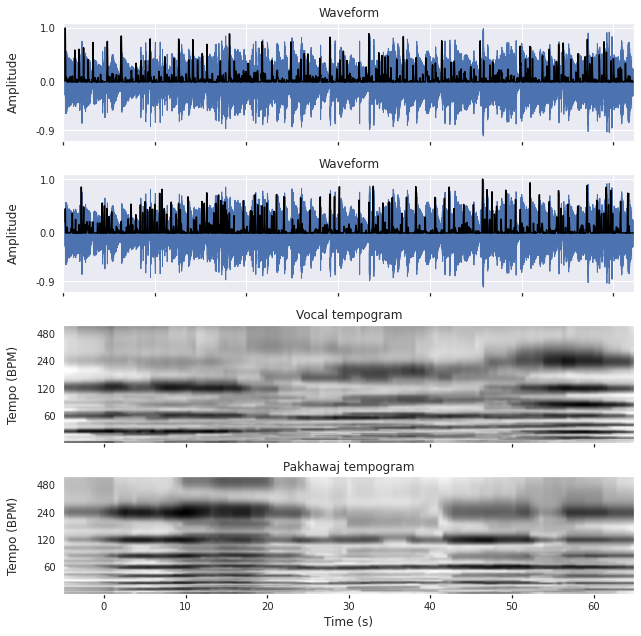

In [20]:
n_subplots=4
fig, ax = ul.generateFig(n_subplots,(9,9),[1/n_subplots]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0], xlabel=False, xticks=True, freqXlabels=10)
ul.plotODF(odf=odf_voc, sr=fs, hopSize_odf=hop_size, ax=ax[0], updatePlot=True)

ul.drawWave(audio=x_mix, ax=ax[1], xlabel=False, xticks=True, freqXlabels=10)
ul.plotODF(odf=odf_pakh, sr=fs, hopSize_odf=hop_size, ax=ax[1], updatePlot=True)

uf.plot_matrix(tempogram_voc, Fs=fs_tempo, F_coef=F_coef, ax=[ax[2]], freq_xlabels=10, colorbar=False, title='Vocal tempogram', xlabel='', ylabel='Tempo (BPM)')
uf.plot_matrix(tempogram_pakh, Fs=fs_tempo, F_coef=F_coef, ax=[ax[3]], freq_xlabels=10, colorbar=False, title='Pakhawaj tempogram', xlabel='Time (s)', ylabel='Tempo (BPM)')

for i in [2,3]:
    ax[i].grid(False)
    ax[i].set_yscale('log')
    ax[i].set_yticks([60,120,240,480])
    ax[i].set_yticklabels([60,120,240,480])

for i in [0,1,2]:
    ax[i].set_xticklabels([])
    
for i in [0,1,2,3]:
    ax[i].yaxis.set_label_coords(-0.075,0.5)
    
plt.tight_layout()